# Understanding and Forecasting Student Performance in India

Team Members :
- Khushal
- Kunal
- Chhaya
- Rishav
- Karan Solanki
- Pallavi

### About The Project:
<b>Objective : </b><br>
Analyze student performance data to uncover patterns in academic success across subjects and demographics. Use statistical analysis and machine learning to predict performance and identify interventions for improvement — useful for educators and policymakers alike. 

<b>Dataset : </b> 
- Source: [Kaggle - Student Performance Dataset (Math, Reading, Writing Scores)] 
- Link: https://www.kaggle.com/datasets/spscientist/students-performance-in-exams 

<b>Columns include : </b> 
- gender, race/ethnicity, parental level of education, 
- lunch, test preparation course 
- math score, reading score, writing score 

<b>Use Cases : </b>
- Predict students at risk of underperforming 
- Understand how socio-economic and educational backgrounds impact scores 
- Recommend interventions (e.g., test prep, tutoring) 
- Visualize gaps across gender or ethnicity groups

## SECTION A: Python & Data Cleaning 

In [1]:
import pandas as pd

# Load dataset
df = pd.read_csv(r"E:\STUDY\2.MCA College(KR Manglam)\Data Science(Bootcamp)\Project\Major\StudentsPerformance.csv")

# Show first few rows
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [2]:
# Show data types and non-null counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [3]:
# Check for null values
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [4]:
# Check for duplicate rows
duplicate_count = df.duplicated().sum()
print("Duplicate rows:", duplicate_count)

Duplicate rows: 0


In [5]:
# Simplify education levels
df['parental level of education'] = df['parental level of education'].replace({
    "some high school": "High School",
    "high school": "High School",
    "some college": "College",
    "associate's degree": "College",
    "bachelor's degree": "University",
    "master's degree": "University"
})

# Rename ethnic groups
df['race/ethnicity'] = df['race/ethnicity'].replace({
    "group A": "Group 1",
    "group B": "Group 2",
    "group C": "Group 3",
    "group D": "Group 4",
    "group E": "Group 5"
})

# Preview changes
df[['race/ethnicity', 'parental level of education']].head()

,race/ethnicity,parental level of education
0,Group 2,University
1,Group 3,College
2,Group 2,University
3,Group 1,College
4,Group 3,College


##
### Average Score

In [6]:
# Calculate average score
df['average score'] = df[['math score', 'reading score', 'writing score']].mean(axis=1)
df[['math score', 'reading score', 'writing score', 'average score']].head()

,math score,reading score,writing score,average score
0,72,72,74,72.666667
1,69,90,88,82.333333
2,90,95,93,92.666667
3,47,57,44,49.333333
4,76,78,75,76.333333


##
### Performance Category

In [7]:
# Define performance category
def categorize(avg):
    if avg >= 80:
        return 'High'
    elif avg >= 60:
        return 'Medium'
    else:
        return 'Low'

df['performance category'] = df['average score'].apply(categorize)
df[['average score', 'performance category']].head()

,average score,performance category
0,72.666667,Medium
1,82.333333,High
2,92.666667,High
3,49.333333,Low
4,76.333333,Medium


##
### Preparation Effectiveness

In [8]:
# Compare scores based on test preparation
prep_effectiveness = df.groupby('test preparation course')['average score'].mean()
print("Preparation Effectiveness:\n", prep_effectiveness)

Preparation Effectiveness:
 test preparation course
completed    72.669460
none         65.038941
Name: average score, dtype: float64


#
## SECTION B: SQL Operations

In [9]:
# Save cleaned file
df.to_csv("cleaned_students1.csv", index=False)

In [10]:
df_copy=df
df_copy

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average score,performance category
0,female,Group 2,University,standard,none,72,72,74,72.666667,Medium
1,female,Group 3,College,standard,completed,69,90,88,82.333333,High
2,female,Group 2,University,standard,none,90,95,93,92.666667,High
3,male,Group 1,College,free/reduced,none,47,57,44,49.333333,Low
4,male,Group 3,College,standard,none,76,78,75,76.333333,Medium
...,...,...,...,...,...,...,...,...,...,...
995,female,Group 5,University,standard,completed,88,99,95,94.000000,High
996,male,Group 3,High School,free/reduced,none,62,55,55,57.333333,Low
997,female,Group 3,High School,free/reduced,completed,59,71,65,65.000000,Medium
998,female,Group 4,College,standard,completed,68,78,77,74.333333,Medium


In [11]:
!pip install mysql-connector-python sqlalchemy

In [12]:
import mysql.connector
import sqlalchemy
print("Connection Established")

Connection Established


In [13]:
import pandas as pd
from sqlalchemy import create_engine

user = "root"
password = "158123"  # ← Encode @ as %40
host = "localhost"
database = "Student_DB"

engine = create_engine(f"mysql+mysqlconnector://{user}:{password}@{host}/{database}")

print("Connected To Mysql")

Connected To Mysql


In [14]:
# Preview the table
df_sql = pd.read_sql("SELECT * FROM students LIMIT 10", engine)
df_sql.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,average_score,performance_category,prep_effective
0,female,Group 2,University,standard,none,72,72,74,72.6667,Medium,None
1,female,Group 3,College,standard,completed,69,90,88,82.3333,High,None
2,female,Group 2,University,standard,none,90,95,93,92.6667,High,None
3,male,Group 1,College,free/reduced,none,47,57,44,49.3333,Low,None
4,male,Group 3,College,standard,none,76,78,75,76.3333,Medium,None


##
### List top 5 students with highest average scores. 

In [15]:
pd.read_sql("SELECT * FROM students ORDER BY average_score DESC LIMIT 5", engine)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,average_score,performance_category,prep_effective
0,female,Group 5,University,standard,none,100,100,100,100.0000,High,None
1,female,Group 5,College,standard,none,100,100,100,100.0000,High,None
2,male,Group 5,University,standard,completed,100,100,100,100.0000,High,None
3,female,Group 5,University,standard,completed,99,100,100,99.6667,High,None
4,female,Group 4,High School,standard,completed,97,100,100,99.0000,High,None


##
### Find the average math, reading, and writing scores by gender. 

In [16]:
pd.read_sql("""
    SELECT gender,
           AVG(math_score) AS avg_math,
           AVG(reading_score) AS avg_reading,
           AVG(writing_score) AS avg_writing
    FROM students
    GROUP BY gender
""", engine)

,gender,avg_math,avg_reading,avg_writing
0,female,63.6332,72.6081,72.4672
1,male,68.7282,65.4730,63.3112


##
### Compare average scores of students who completed test prep vs. those who didn’t. 

In [17]:
pd.read_sql("""
    SELECT test_preparation_course,
           AVG(math_score) AS avg_math,
           AVG(reading_score) AS avg_reading,
           AVG(writing_score) AS avg_writing
    FROM students
    GROUP BY test_preparation_course
""", engine)

,test_preparation_course,avg_math,avg_reading,avg_writing
0,none,64.0779,66.5343,64.5047
1,completed,69.6955,73.8939,74.4190


## 
### Count how many students fall into each performance category.

In [18]:
pd.read_sql("""SELECT performance_category, count(performance_category) As student_count FROM students
GROUP BY performance_category""", engine)

,performance_category,student_count
0,Medium,517
1,High,198
2,Low,285


##
### Identify which ethnic group has the highest average total score.

In [19]:
pd.read_sql("""
    SELECT race_ethnicity, AVG(average_score) FROM students
GROUP BY race_ethnicity
ORDER BY AVG(average_score) DESC LIMIT 1
""", engine)

,race_ethnicity,AVG(average_score)
0,Group 5,72.752381


#
## SECTION C: Exploratory Data Analysis & Descriptive Statistics 

##
### Exploratory Data Analysis

In [20]:
# Import Required Libraries

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


# Set theme for seaborn
sns.set(style="whitegrid")

##
###  Histograms for All Three Subject Scores

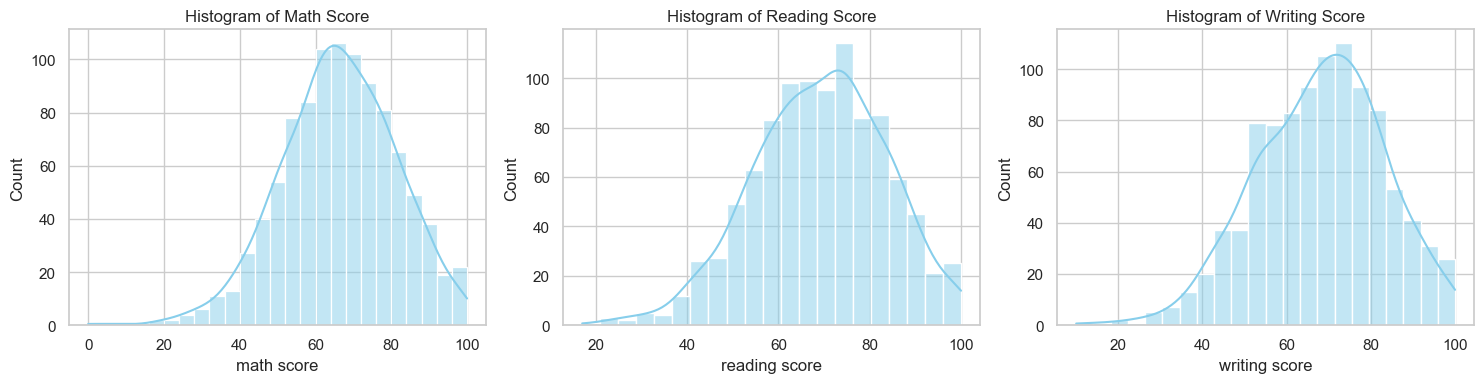

In [21]:
plt.figure(figsize=(15, 4))
for i, subject in enumerate(['math score', 'reading score', 'writing score']):
    plt.subplot(1, 3, i+1)
    sns.histplot(df[subject], kde=True, color='skyblue')
    plt.title(f'Histogram of {subject.replace("_", " ").title()}')
plt.tight_layout()
plt.show()

##
### Box Plots – Scores by Gender and Parental Education Level

C:\Users\karan\AppData\Local\Temp\ipykernel_16060\2421890946.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='gender', y='average score', data=df, palette='Set2')
C:\Users\karan\AppData\Local\Temp\ipykernel_16060\2421890946.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='parental level of education', y='average score', data=df, palette='Set3')


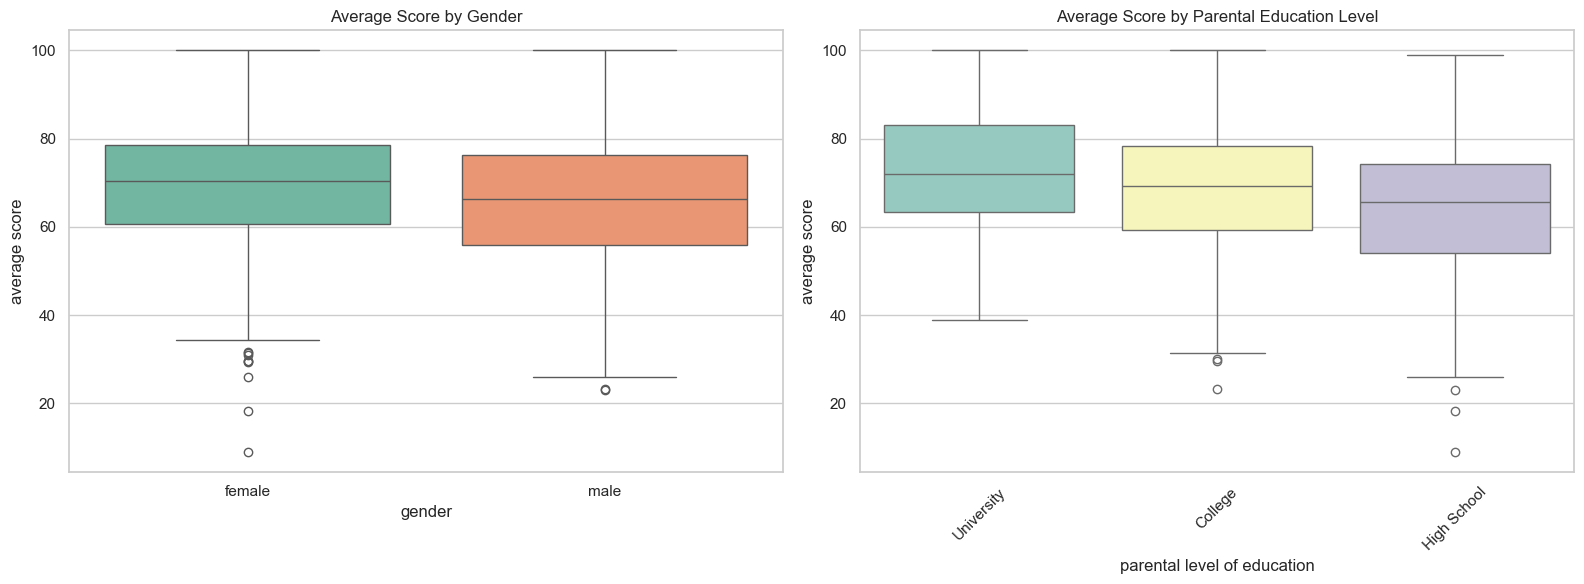

In [22]:
plt.figure(figsize=(16, 6))

# By Gender
plt.subplot(1, 2, 1)
sns.boxplot(x='gender', y='average score', data=df, palette='Set2')
plt.title('Average Score by Gender')

# By Parental Education
plt.subplot(1, 2, 2)
sns.boxplot(x='parental level of education', y='average score', data=df, palette='Set3')
plt.xticks(rotation=45)
plt.title('Average Score by Parental Education Level')

plt.tight_layout()
plt.show()

##
### Grouped Bar Plot – Average Scores by Test Preparation & Lunch Type

C:\Users\karan\AppData\Local\Temp\ipykernel_16060\3492282463.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='test preparation course', y='average score', data=df, palette='pastel')
C:\Users\karan\AppData\Local\Temp\ipykernel_16060\3492282463.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='lunch', y='average score', data=df, palette='muted')


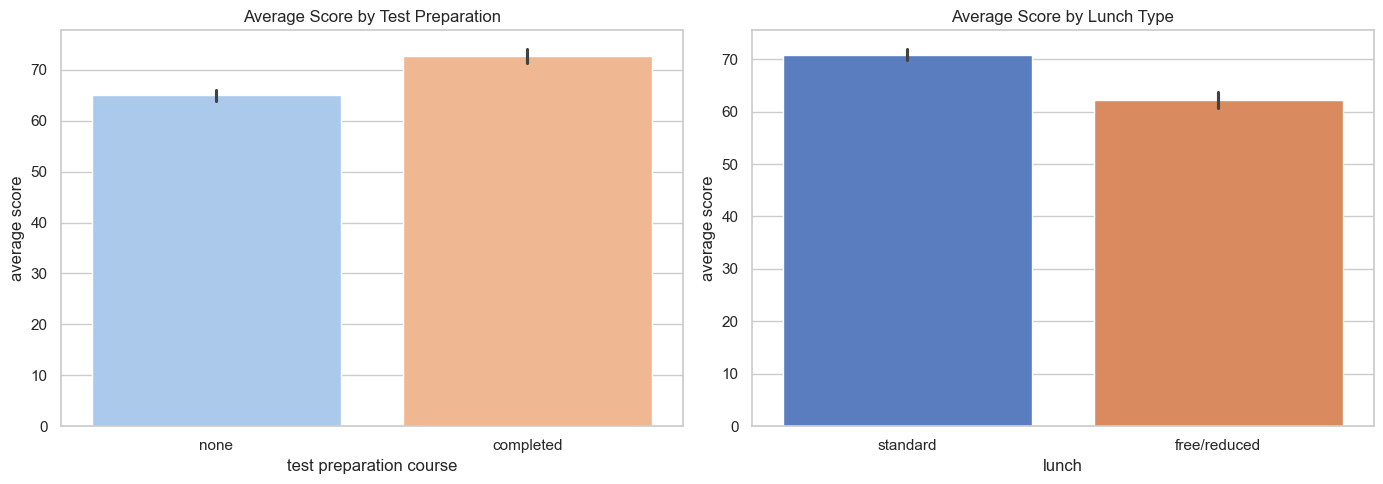

In [23]:
plt.figure(figsize=(14, 5))

# Test Preparation
plt.subplot(1, 2, 1)
sns.barplot(x='test preparation course', y='average score', data=df, palette='pastel')
plt.title('Average Score by Test Preparation')

# Lunch Type
plt.subplot(1, 2, 2)
sns.barplot(x='lunch', y='average score', data=df, palette='muted')
plt.title('Average Score by Lunch Type')

plt.tight_layout()
plt.show()

##
### Heatmap – Correlation Among Numerical Features

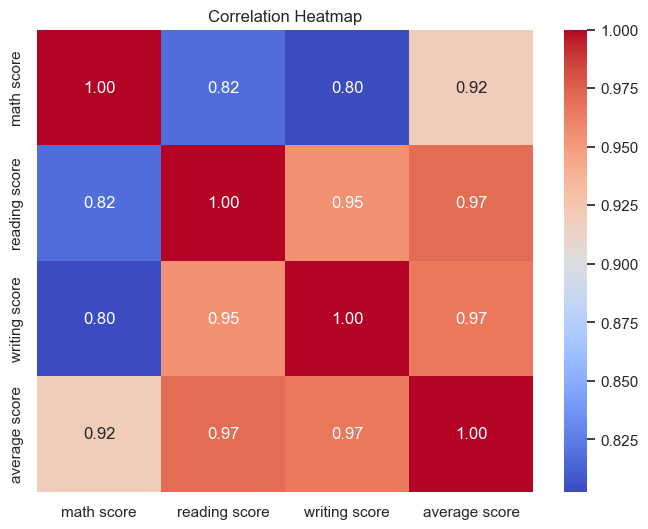

In [24]:
plt.figure(figsize=(8, 6))
sns.heatmap(df[['math score', 'reading score', 'writing score', 'average score']].corr(), 
            annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

##
### Scatter Plot – Math vs. Reading Scores (Performance Category Color)

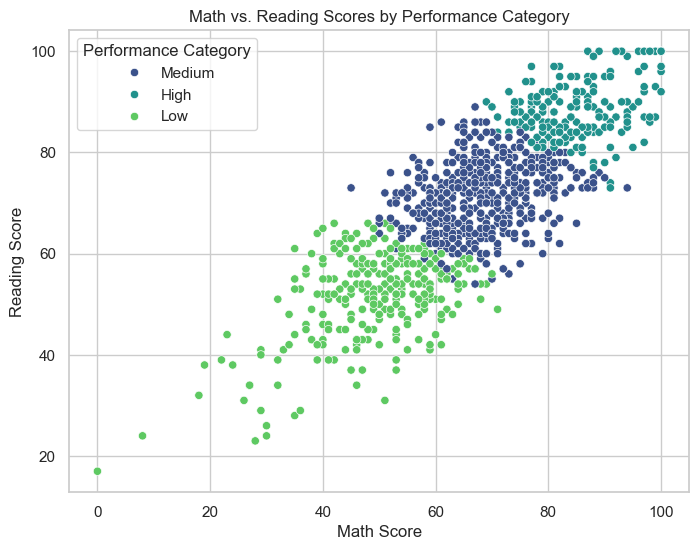

In [25]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='math score', y='reading score', hue='performance category', palette='viridis')
plt.title('Math vs. Reading Scores by Performance Category')
plt.xlabel('Math Score')
plt.ylabel('Reading Score')
plt.legend(title='Performance Category')
plt.show()

##
### Stacked Bar Chart – Performance Category by Ethnic Group

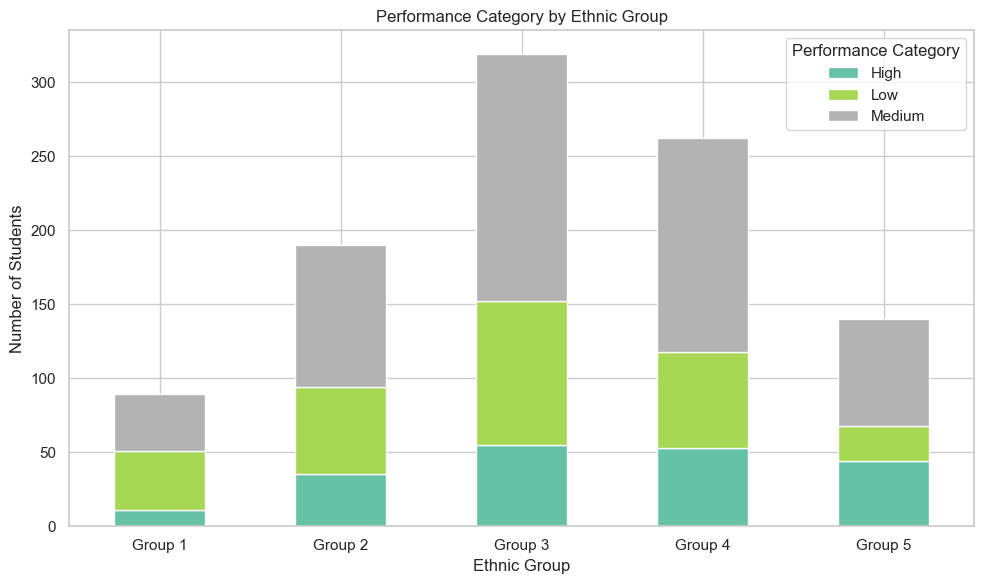

In [26]:
performance_ethnicity = df.groupby(['race/ethnicity', 'performance category']).size().unstack().fillna(0)
performance_ethnicity.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='Set2')
plt.title("Performance Category by Ethnic Group")
plt.ylabel("Number of Students")
plt.xlabel("Ethnic Group")
plt.xticks(rotation=0)
plt.legend(title='Performance Category')
plt.tight_layout()
plt.show()

##
### Count Plot – Students in Each Performance Tier by Gender

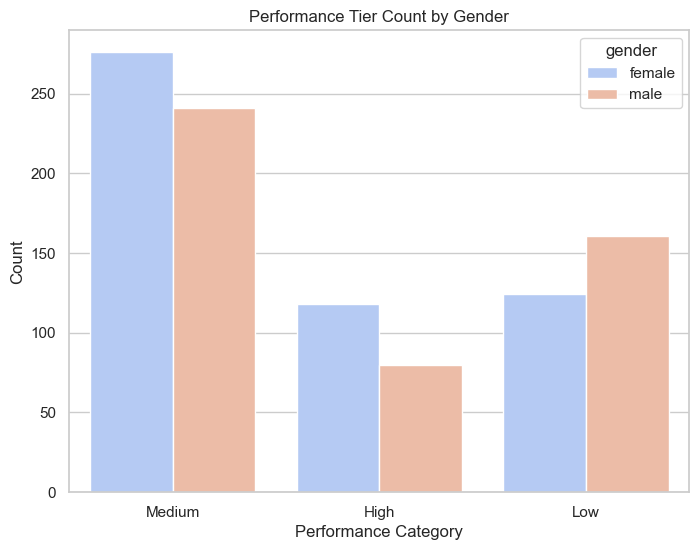

In [27]:

plt.figure(figsize=(8, 6))
sns.countplot(x='performance category', hue='gender', data=df, palette='coolwarm')
plt.title("Performance Tier Count by Gender")
plt.xlabel("Performance Category")
plt.ylabel("Count")
plt.show()


##
### Descriptive Statistics 

##
### Calculate mean, median, variance, and standard deviation for all three scores

In [28]:
# Define the score columns
score_columns = ['math score', 'reading score', 'writing score']

# Calculate descriptive statistics
desc_stats = df[score_columns].agg(['mean', 'median', 'var', 'std'])

# Display the result
print("Descriptive Statistics for Math, Reading, and Writing Scores:")
print(desc_stats)

Descriptive Statistics for Math, Reading, and Writing Scores:
        math score  reading score  writing score
mean     66.089000      69.169000      68.054000
median   66.000000      70.000000      69.000000
var     229.918998     213.165605     230.907992
std      15.163080      14.600192      15.195657


##
### Create summary tables showing average scores per category (e.g., lunch type, test prep)

In [29]:
# Define the score columns
score_columns = ['math score', 'reading score', 'writing score']

# Average scores by lunch type
avg_by_lunch = df.groupby('lunch')[score_columns].mean()
print("Average Scores by Lunch Type:")
print(avg_by_lunch)
print("\n")

# Average scores by test preparation course
avg_by_test_prep = df.groupby('test preparation course')[score_columns].mean()
print("Average Scores by Test Preparation Course:")
print(avg_by_test_prep)

Average Scores by Lunch Type:
              math score  reading score  writing score
lunch                                                 
free/reduced   58.921127      64.653521      63.022535
standard       70.034109      71.654264      70.823256


Average Scores by Test Preparation Course:
                         math score  reading score  writing score
test preparation course                                          
completed                 69.695531      73.893855      74.418994
none                      64.077882      66.534268      64.504673


##
### Calculate coefficient of variation for math, reading, and writing scores.

In [30]:
# Coefficient of Variation (CV) = Standard Deviation / Mean
cv_scores = df[score_columns].std() / df[score_columns].mean()

# Convert to percentage for easier interpretation
cv_percent = cv_scores * 100

print("Coefficient of Variation for Scores (in %):")
print(cv_percent.round(2))

Coefficient of Variation for Scores (in %):
math score       22.94
reading score    21.11
writing score    22.33
dtype: float64


##
### Rank top 3 factors associated with high performance (based on group averages).

In [31]:
# Step 1: Add a column for average score
df['average score'] = df[['math score', 'reading score', 'writing score']].mean(axis=1)

# Step 2: List of categorical features to evaluate
categorical_features = ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']

# Step 3: Compute max average score within each category of each feature
group_max_scores = {
    feature: df.groupby(feature)['average score'].mean().max()
    for feature in categorical_features
}

# Step 4: Rank the features by their best-performing group
sorted_factors = sorted(group_max_scores.items(), key=lambda x: x[1], reverse=True)

# Step 5: Display top 3 factors
print("Top 3 Factors Associated with High Performance:")
for i, (feature, score) in enumerate(sorted_factors[:3], 1):
    print(f"{i}. {feature} — Highest Group Avg Score: {score:.2f}")

Top 3 Factors Associated with High Performance:
1. race/ethnicity — Highest Group Avg Score: 72.75
2. test preparation course — Highest Group Avg Score: 72.67
3. parental level of education — Highest Group Avg Score: 72.48


##
### Determine which feature (e.g., lunch type, gender) has the largest score variance.

In [32]:
# Ensure average score column exists
if 'average score' not in df.columns:
    df['average score'] = df[['math score', 'reading score', 'writing score']].mean(axis=1)

# Categorical features to evaluate
categorical_features = ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']

# Compute variance of average scores within each group
feature_variances = {
    feature: df.groupby(feature)['average score'].var().max()
    for feature in categorical_features
}

# Find the feature with the largest group variance
max_variance_feature = max(feature_variances, key=feature_variances.get)
max_variance_value = feature_variances[max_variance_feature]

# Print result
print("Feature with the Largest Score Variance:")
print(f"{max_variance_feature} — Max Group Variance: {max_variance_value:.2f}")


Feature with the Largest Score Variance:
race/ethnicity — Max Group Variance: 217.04


#
## SECTION E: Machine Learning 

## 
### Regression Task 

In [47]:
# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Step 2: Load the data
df = pd.read_csv("cleaned_students1.csv")

# Step 3: Create total and average scores
df['total_score'] = df[['math score', 'reading score', 'writing score']].sum(axis=1)
df['average_score'] = df['total_score']

# Step 4: Encode categorical features
label_encoders = {}
categorical_cols = df.select_dtypes(include='object').columns

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Step 5: Define features (X) and target (y)
# You can switch between 'total_score' or 'average_score'
X = df.drop(columns=['math score', 'reading score', 'writing score', 'total_score', 'average_score'])
y = df['average_score']  # or use df['total_score']

# Step 6: Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 7: Train and evaluate Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)

print("🔹 Linear Regression Results:")
print("MAE:", mean_absolute_error(y_test, lr_pred))
print("MSE:", mean_squared_error(y_test, lr_pred))
print("R² Score:", r2_score(y_test, lr_pred))

# Step 8: Train and evaluate Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

print("\n🔹 Random Forest Regressor Results:")
print("MAE:", mean_absolute_error(y_test, rf_pred))
print("MSE:", mean_squared_error(y_test, rf_pred))
print("R² Score:", r2_score(y_test, rf_pred))

🔹 Linear Regression Results:
MAE: 1.879385536085465e-14
MSE: 5.263279959634591e-28
R² Score: 1.0

🔹 Random Forest Regressor Results:
MAE: 0.31059999999999877
MSE: 6.891654
R² Score: 0.996427897571714


##
### Classification Task

In [48]:
# Step 1: Imports
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Step 2: Load the data
df = pd.read_csv(r"E:\STUDY\2.MCA College(KR Manglam)\Data Science(Bootcamp)\Project\Major\StudentsPerformance.csv")

# Step 3: Feature engineering - total and average score
df['total_score'] = df[['math score', 'reading score', 'writing score']].sum(axis=1)
df['average_score'] = df['total_score'] / 2

# Step 4: Create performance bucket
def performance_bucket(score):
    if score < 60:
        return 'Low'
    elif score < 80:
        return 'Medium'
    else:
        return 'High'

df['performance'] = df['average_score'].apply(performance_bucket)

# Step 5: Encode categorical variables
label_encoders = {}
for col in df.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Step 6: Prepare features and target
X = df.drop(columns=['math score', 'reading score', 'writing score', 'total_score', 'average_score', 'performance'])
y = df['performance']

# Step 7: Train/Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 8: Train models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42)
}

for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    print(f"\n🔹 {name} Accuracy: {accuracy_score(y_test, preds):.4f}")


🔹 Logistic Regression Accuracy: 0.8150

🔹 Decision Tree Accuracy: 0.8000

🔹 Random Forest Accuracy: 0.8100
